In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
sales_data=pd.read_csv(r"//Users//sreeramkn//Downloads//Company_Data.csv")
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Initial investigation

In [3]:
sales_data.shape

(400, 11)

In [4]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
sales_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
sales_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
sales_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Number of features and records in the given data set is 11 and 400 respesctively

There is no null values in the data set

The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

### Data preparation

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
sales_data['ShelveLoc']=le.fit_transform(sales_data['ShelveLoc'])
sales_data['Urban']=le.fit_transform(sales_data['Urban'])
sales_data['US']=le.fit_transform(sales_data['US'])
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

#### Converting sales to category of high,medium and low sales

In [10]:
sales_data.insert(11,'sales_category','')
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [11]:
for i in range(0,len(sales_data['Sales']),1):
    if sales_data['Sales'][i]>=11.0:
        sales_data["sales_category"][i]='high'
    elif sales_data['Sales'][i]<=6.0:
        sales_data['sales_category'][i]='Low'
    else:
        sales_data['sales_category'][i]='Medium'

In [12]:
sales_data['sales_category'].nunique()

3

In [13]:
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


### Model building

In [14]:
x=sales_data.iloc[:,1:11]
y=sales_data.iloc[:,11:12]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training before selecting important feature

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [17]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.69      0.64      0.67        28
      Medium       0.66      0.81      0.73        43
        high       1.00      0.11      0.20         9

    accuracy                           0.68        80
   macro avg       0.78      0.52      0.53        80
weighted avg       0.71      0.68      0.65        80



In [20]:
print(accuracy_score(y_test,y_pred))

0.675


In [21]:
confusion_matrix_data=confusion_matrix(y_test,y_pred)
confusion_matrix_data

array([[18, 10,  0],
       [ 8, 35,  0],
       [ 0,  8,  1]])

<AxesSubplot:>

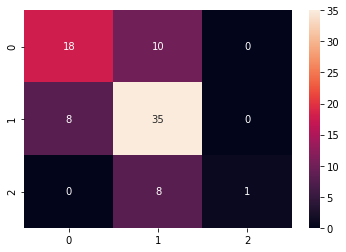

In [22]:
sns.heatmap(confusion_matrix_data,annot=True)

#### Hyperparameter tweaking by using GridsearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators':[20,30,20,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
0.728125


In [24]:
rf_model_cv=RandomForestClassifier(max_depth=10,min_samples_leaf=2,criterion='entropy',n_estimators=30)
rf_model_cv.fit(x_train,y_train)
y_pred=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7


#### Feature importance plot

In [25]:
feature_rf=x_train.columns
len(feature_rf)

10

In [26]:
imp_feature_rf=rf_model.feature_importances_
len(imp_feature_rf)

10

In [27]:
data_rf=pd.DataFrame({'feature':feature_rf,'imp_feature':imp_feature_rf})
data_rf=data_rf.sort_values('imp_feature')

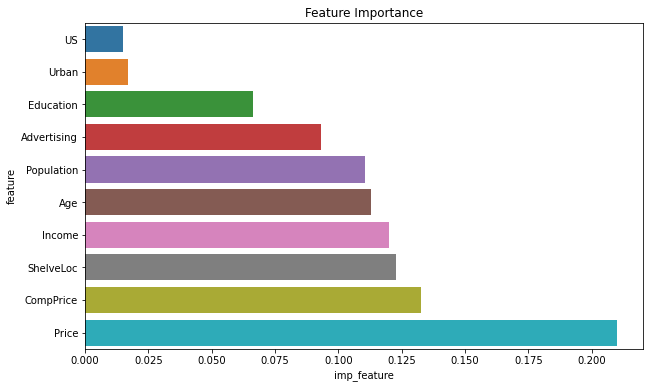

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rf)
plt.show()

The plot clearly shows that some of the features donot contribute much for model building

Hence the accuracy can be imporved by droping those insignificant features

### Feature selection by feature importance for Decision tree

In [29]:
from sklearn.feature_selection import SelectFromModel 

In [30]:
selector=SelectFromModel(estimator=RandomForestClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [31]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [32]:
len(x_train.columns)

10

In [33]:
feature=x_train.columns[selector.get_support()]

In [34]:
len(x_train.columns[selector.get_support()])

6

Out of 10 features only 5 features is selscted for building models

In [35]:
x_train_rf=selector.transform(x_train)
x_test_rf=selector.transform(x_test)

In [36]:
rf_model_imp=RandomForestClassifier().fit(x_train_rf,y_train)
y_pred_imp=rf_model_imp.predict(x_test_rf)

In [37]:
print(accuracy_score(y_test,y_pred_imp))

0.65


In [38]:
print(confusion_matrix(y_test,y_pred_imp))

[[17 11  0]
 [ 9 32  2]
 [ 0  6  3]]


In [39]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

         Low       0.65      0.61      0.63        28
      Medium       0.65      0.74      0.70        43
        high       0.60      0.33      0.43         9

    accuracy                           0.65        80
   macro avg       0.64      0.56      0.58        80
weighted avg       0.65      0.65      0.64        80



In [40]:
imp_feature=rf_model_imp.feature_importances_
imp_feature

array([0.17918609, 0.14866769, 0.1406518 , 0.25002373, 0.14027523,
       0.14119546])

In [41]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

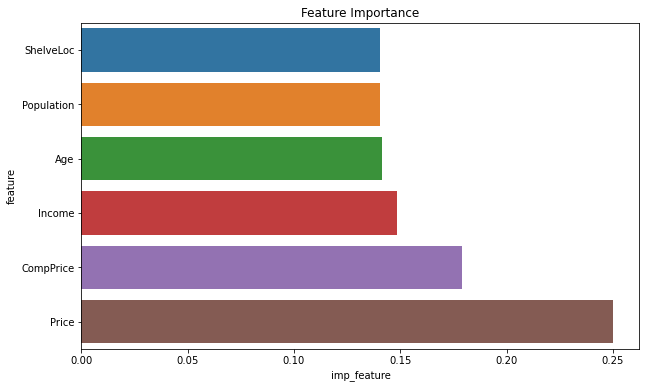

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

#### Recursive feature elimination

In [43]:
from sklearn.feature_selection import RFE

In [44]:
selector_rfe=RFE(RandomForestClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [45]:
selector_rfe.get_support()

array([ True,  True, False,  True,  True, False,  True, False, False,
       False])

In [46]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Population', 'Price', 'Age'], dtype='object')

In [47]:
len(x_train.columns[selector_rfe.get_support()])

5

Here 5 out of 10 feature is selected as an important feature

In [48]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [49]:
rf_model_rfe=RandomForestClassifier().fit(x_train_rfe,y_train)

In [50]:
y_pred_rfe=rf_model_rfe.predict(x_test_rfe)

In [51]:
print(accuracy_score(y_test,y_pred_rfe))

0.575


In [52]:
print(confusion_matrix(y_test,y_pred_rfe))

[[14 14  0]
 [10 30  3]
 [ 0  7  2]]


In [53]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

         Low       0.58      0.50      0.54        28
      Medium       0.59      0.70      0.64        43
        high       0.40      0.22      0.29         9

    accuracy                           0.57        80
   macro avg       0.52      0.47      0.49        80
weighted avg       0.57      0.57      0.56        80



In [54]:
imp_feature_rfe=rf_model_rfe.feature_importances_

In [55]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

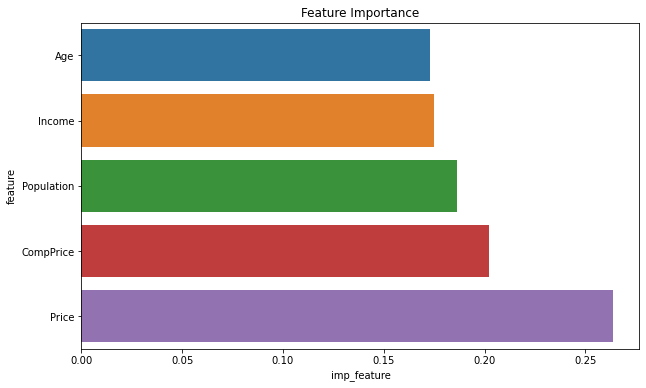

In [56]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()

Inference

Price is the feature which affect/contibute more for the sales

Competerior price fallows price which affect the most